### Import  required libraries

In [1]:
!pip install factor_analyzer 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

C:\Python\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


# Problem Statement 1A

In [3]:
df_1 = pd.read_csv('SalaryData.csv')

In [4]:
df_1

Education        Occupation  Salary
0    Doctorate      Adm-clerical  153197
1    Doctorate      Adm-clerical  115945
2    Doctorate      Adm-clerical  175935
3    Doctorate      Adm-clerical  220754
4    Doctorate             Sales  170769
5    Doctorate             Sales  219420
6    Doctorate             Sales  237920
7    Doctorate             Sales  160540
8    Doctorate             Sales  180934
9    Doctorate    Prof-specialty  248156
10   Doctorate    Prof-specialty  247724
11   Doctorate    Prof-specialty  249207
12   Doctorate    Prof-specialty  235334
13   Doctorate    Prof-specialty  248871
14   Doctorate    Prof-specialty  257345
15   Bachelors      Adm-clerical  160910
16   Bachelors      Adm-clerical  162494
17   Bachelors      Adm-clerical  188729
18   Bachelors    Prof-specialty   99185
19   Bachelors    Prof-specialty   90135
20   Bachelors    Prof-specialty  100135
21   Bachelors    Prof-specialty  133696
22   Bachelors             Sales  149909
23   Bachelors             Sales  191712
24   Bachelors             Sales  167431
25   Bachelors             Sales  260151
26     HS-grad             Sales   50103
27     HS-grad             Sales   50122
28     HS-grad             Sales   52242
29     HS-grad      Adm-clerical   75333
30     HS-grad      Adm-clerical   77743
31     HS-grad      Adm-clerical   83203
32     HS-grad    Prof-specialty   90456
33     HS-grad    Prof-specialty  100678
34     HS-grad    Prof-specialty   95469
35   Bachelors   Exec-managerial  173935
36   Bachelors   Exec-managerial  212448
37   Bachelors   Exec-managerial  173664
38   Bachelors   Exec-managerial  212760
39   Doctorate   Exec-managerial  212781

In [5]:
df_1.Education=pd.Categorical(df_1.Education)
df_1.Occupation=pd.Categorical(df_1.Occupation)

### One-way ANOVA for Education with respect to the variable ‘Salary’

In [6]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df_1).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

### One-way ANOVA for Occupation with respect to the variable ‘Salary’

In [7]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df_1).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

In [8]:
formula = 'Salary ~ C(Occupation) + C(Education)'
model = ols(formula, df_1).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F        PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09   2.284576  9.648715e-02
C(Education)    2.0  9.695663e+10  4.847831e+10  29.510933  3.708479e-08
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

### Interaction point plot

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

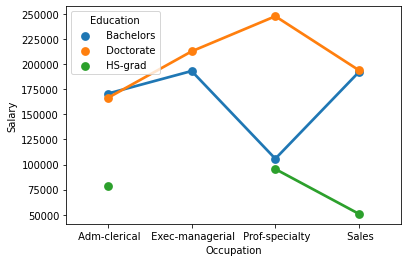

In [9]:
sns.pointplot(x='Occupation', y='Salary', hue='Education', data=df_1, ci=None)

### Two-way ANOVA for Education and Occupation with interaction in respect to the variable ‘Salary’

In [10]:
formula = 'Salary ~ C(Occupation) + C(Education)+ C(Education):C(Occupation)'
model = ols(formula, df_1).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Occupation)                3.0  1.125878e+10  3.752928e+09   5.277862   
C(Education)                 2.0  9.695663e+10  4.847831e+10  68.176603   
C(Education):C(Occupation)   6.0  3.563950e+10  5.939916e+09   8.353494   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Occupation)               4.993238e-03  
C(Education)                1.090908e-11  
C(Education):C(Occupation)  2.643089e-05  
Residual                             NaN

### TUKEY HSD ANALYSIS 

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_1['Salary'], groups=df_1['Education'], alpha=0.05)
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_1['Salary'], groups=df_1['Occupation'], alpha=0.05)
print(tukey)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


### Problem 2: EDUCATION POST 12 STD.

In [13]:
df = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [14]:
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [15]:
df.shape

(777, 18)

In [16]:
df.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [18]:
ranges=df.describe().T
ranges['IQR Range']=ranges['75%']-ranges['25%']
ranges['Upper Range']=ranges['75%']+1.5*ranges['IQR Range']
ranges['Lower Range']=ranges['25%']-1.5*ranges['IQR Range']
ranges.drop(['count', 'mean', 'std', '25%', '50%', '75%'],axis=1)

min      max  IQR Range  Upper Range  Lower Range
Apps           81.0  48094.0     2848.0       7896.0      -3496.0
Accept         72.0  26330.0     1820.0       5154.0      -2126.0
Enroll         35.0   6392.0      660.0       1892.0       -748.0
Top10perc       1.0     96.0       20.0         65.0        -15.0
Top25perc       9.0    100.0       28.0        111.0         -1.0
F.Undergrad   139.0  31643.0     3013.0       8524.5      -3527.5
P.Undergrad     1.0  21836.0      872.0       2275.0      -1213.0
Outstate     2340.0  21700.0     5605.0      21332.5      -1087.5
Room.Board   1780.0   8124.0     1453.0       7229.5       1417.5
Books          96.0   2340.0      130.0        795.0        275.0
Personal      250.0   6800.0      850.0       2975.0       -425.0
PhD             8.0    103.0       23.0        119.5         27.5
Terminal       24.0    100.0       21.0        123.5         39.5
S.F.Ratio       2.5     39.8        5.0         24.0          4.0
perc.alumni     0.0     64.0       18.0         58.0        -14.0
Expend       3186.0  56233.0     4079.0      16948.5        632.5
Grad.Rate      10.0    118.0       25.0        115.5         15.5

### Data Cleanup

In [19]:
df.duplicated().sum()

0

In [20]:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [21]:
df_pca = df.drop(['Names'], axis = 1)

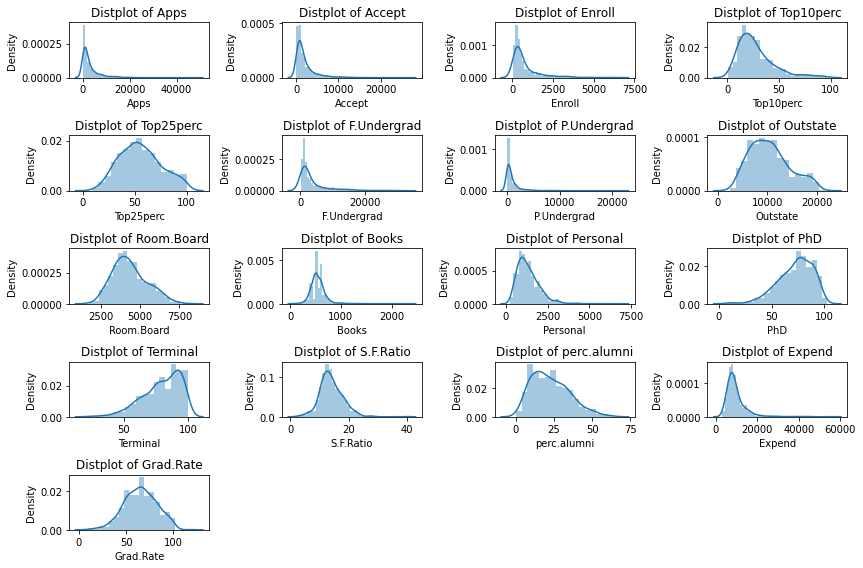

In [22]:
# DISTRIBUTION PLOT FOR ALL THE FEATURES
plt.figure(figsize = (12,8))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.distplot(df_pca[feature_list[i]])
    plt.title('Distplot of {}'.format(feature_list[i]))
    plt.tight_layout()

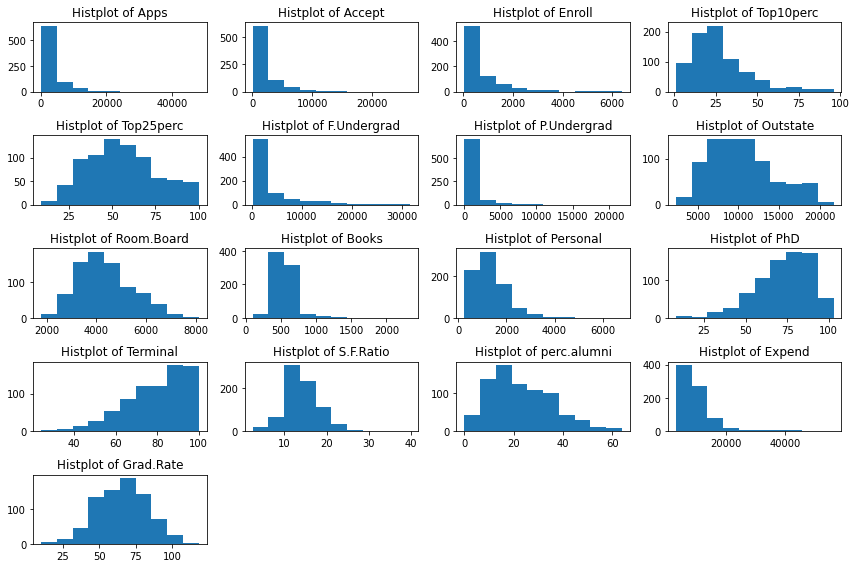

In [23]:
# HISTOGRAM PLOT FOR ALL THE FEATURES WITHOUT SCALING
plt.figure(figsize = (12,8))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    plt.hist(df_pca[feature_list[i]])
    plt.title('Histplot of {}'.format(feature_list[i]))
    plt.tight_layout()

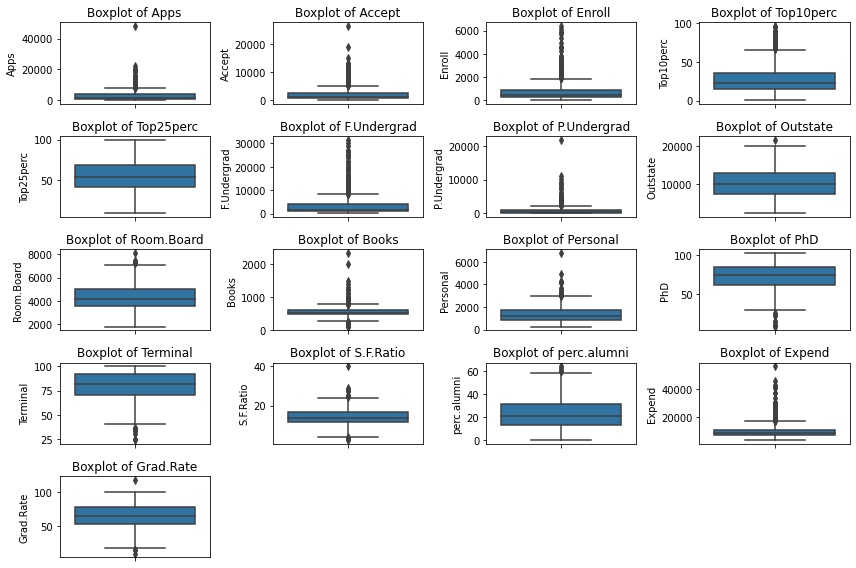

In [24]:
# BOXPLOT OF ALL THE FEATURES WITHOUT SCALING FOR OUTLIER IDENTIFICAITON 
plt.figure(figsize = (12,8))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<AxesSubplot:>

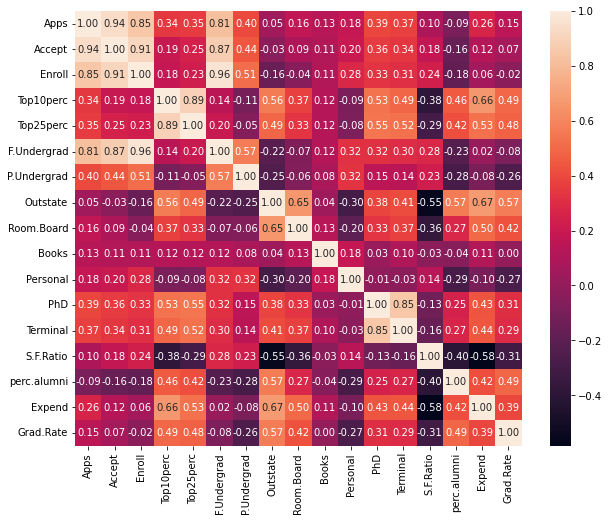

In [25]:
plt.figure(figsize = (10,8))
sns.heatmap(df_pca.corr(), annot=True,fmt='.2f')

<Figure size 720x576 with 0 Axes>

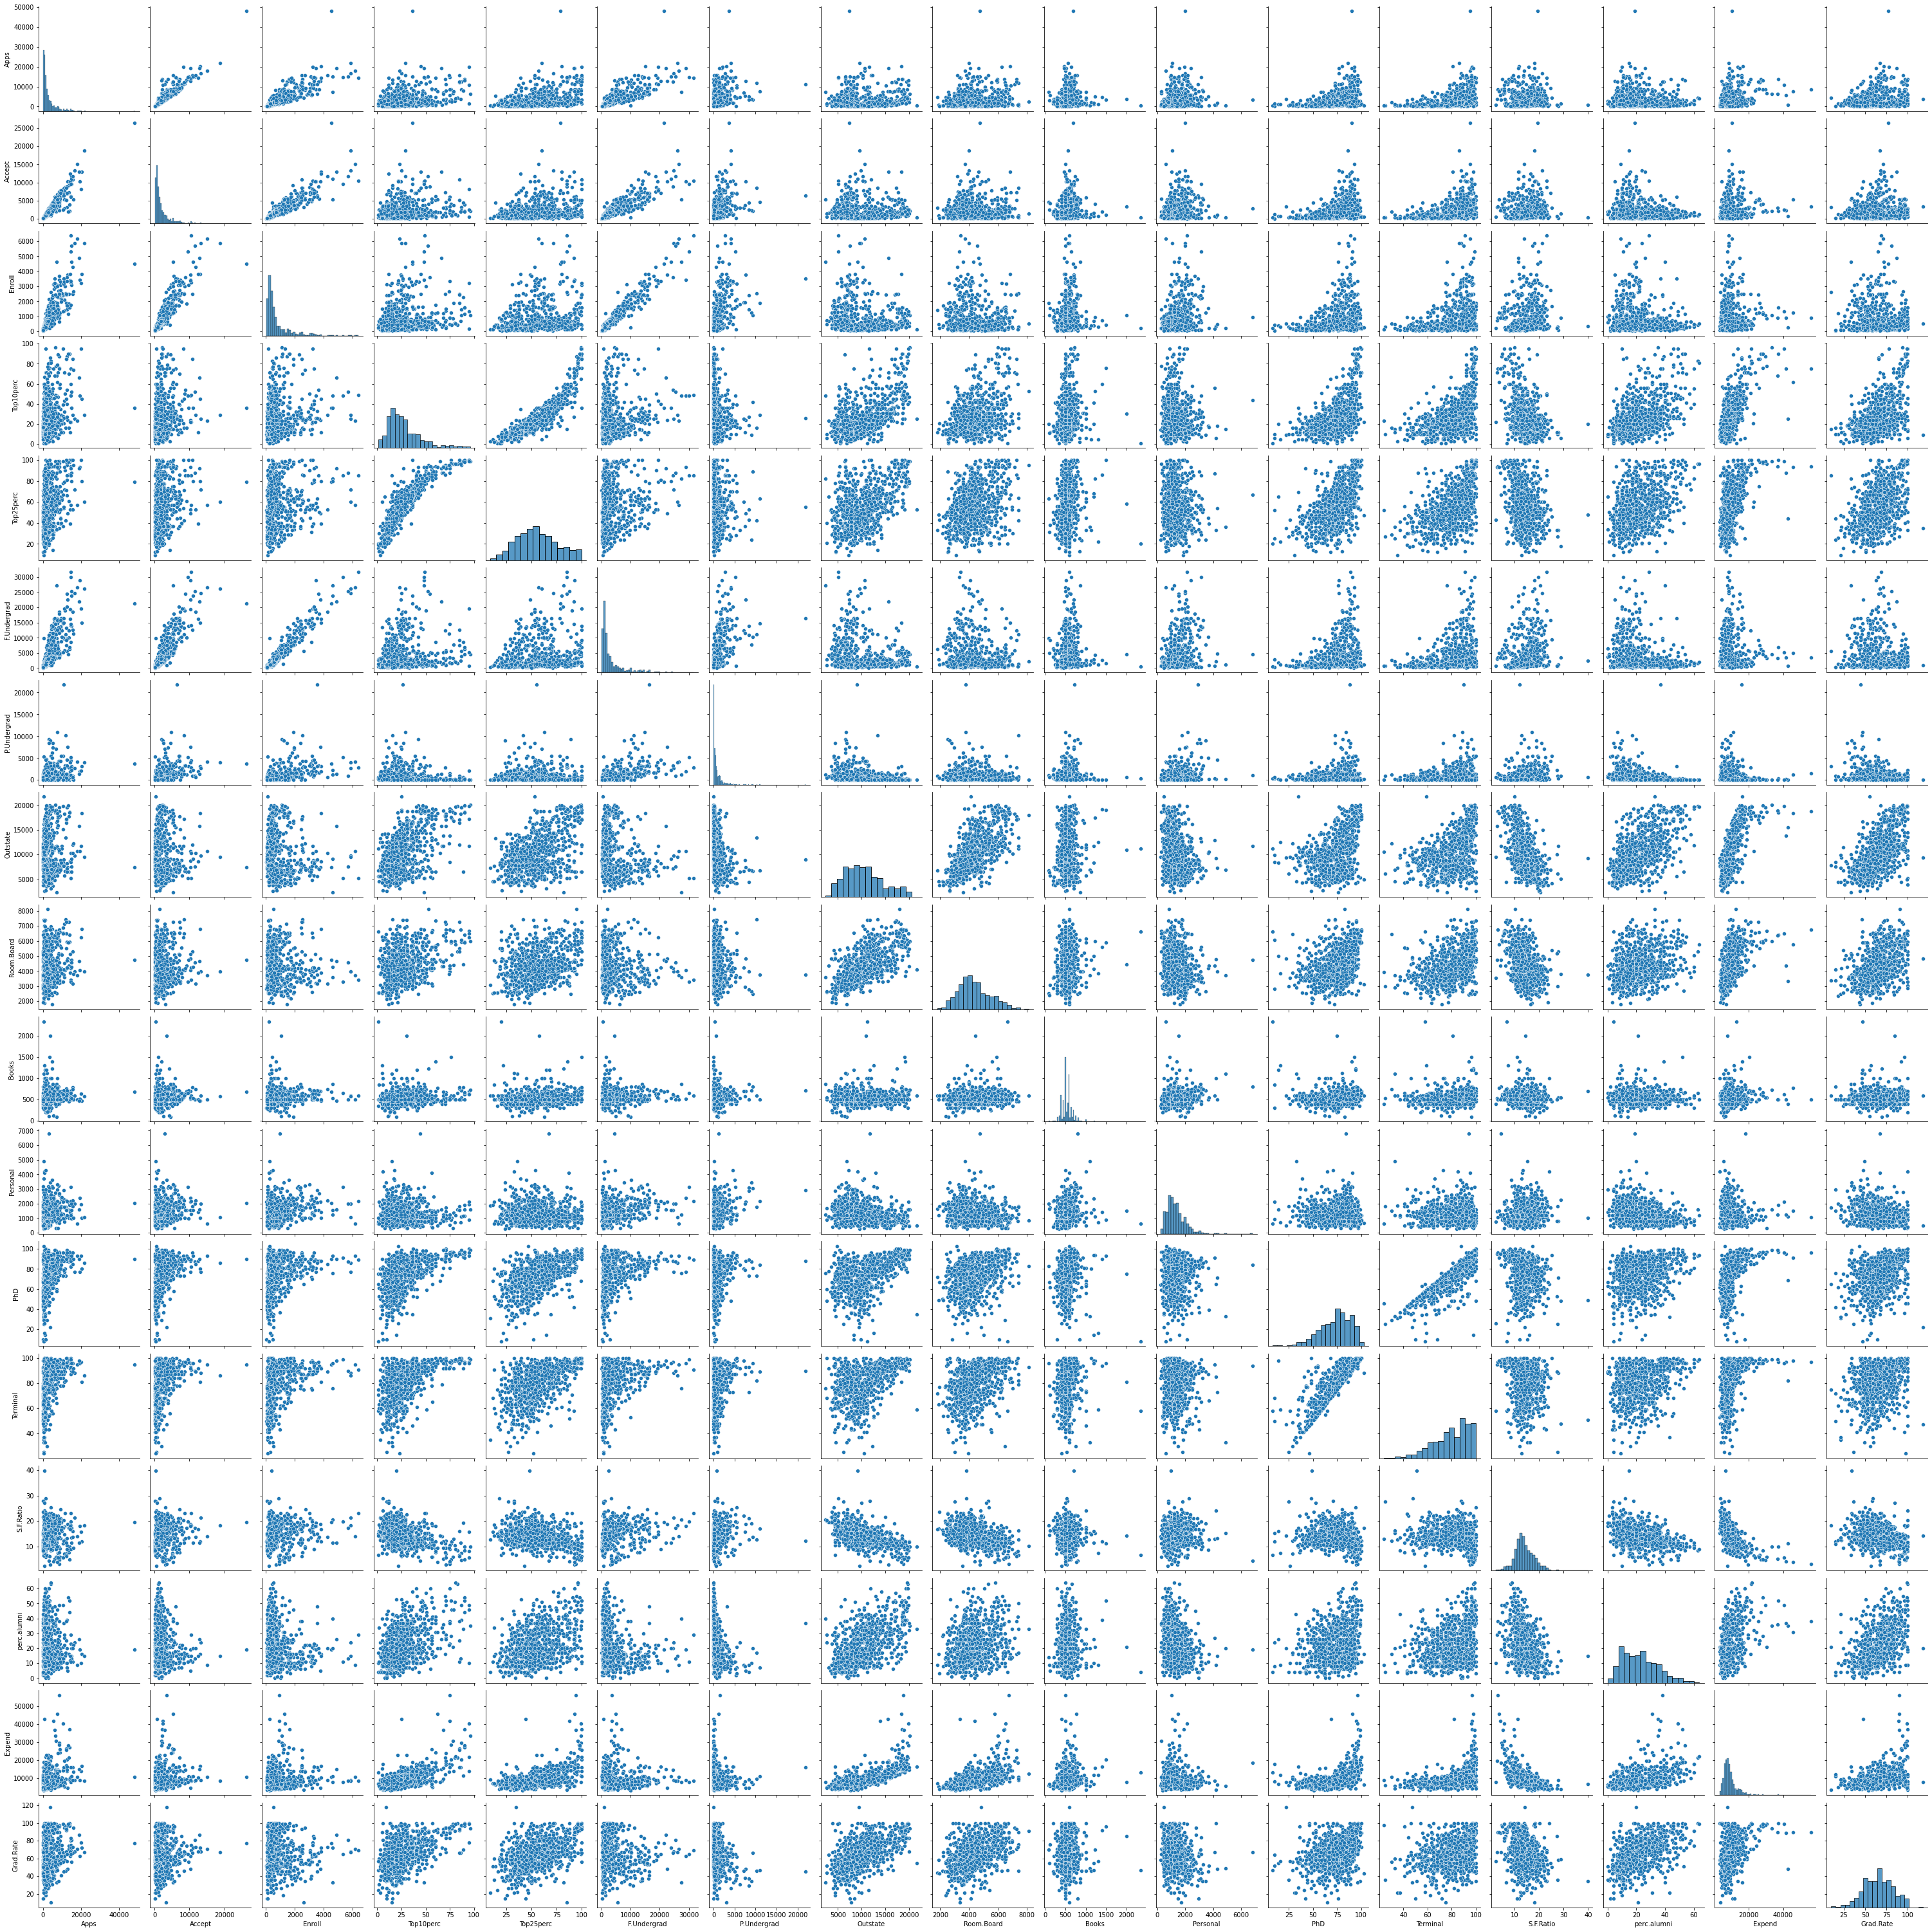

In [26]:
plt.figure(figsize = (10,8))
sns.pairplot(df_pca)

In [27]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
# def remove_outlier(col):
#     Q1,Q3=col.quantile([0.25,0.75])
#     IQR=Q3-Q1
#     lower_range= Q1-(1.5 * IQR)
#     upper_range= Q3+(1.5 * IQR)
#     return lower_range, upper_range   

In [28]:
#Cap & floor the values beyond the outlier boundaries
# for i in feature_list:
#     LL, UL = remove_outlier(df_pca[i])
#     df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
#     df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

In [29]:
#Check to verify if outliers have been treated
# plt.figure(figsize = (12,8))
# feature_list = df_pca.columns
# for i in range(len(feature_list)):
#     plt.subplot(5, 4, i + 1)
#     sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
#     plt.title('Boxplot of {}'.format(feature_list[i]))
#     plt.tight_layout()

In [30]:
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [31]:
#Check the data post scaling
df_pca_scaled.head(18)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1  -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2  -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3  -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4  -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
5  -0.624307 -0.628611 -0.669812   0.592287   0.313426    -0.623421   
6  -0.684808 -0.685356 -0.729043  -0.598931  -0.545505    -0.677472   
7  -0.285088 -0.121984 -0.313353   0.535563   0.616579    -0.434450   
8  -0.507700 -0.481644 -0.595505   0.138490   0.363952    -0.562562   
9  -0.625600 -0.620854 -0.654735  -0.372032  -0.596031    -0.598459   
10 -0.328266 -0.242415 -0.331661   0.535563   0.970257    -0.385763   
11 -0.090399 -0.048501 -0.318738   0.932636   1.071307    -0.411138   
12 -0.471245 -0.505730 -0.527659   0.592287   0.414477    -0.530173   
13 -0.448492 -0.383258 -0.425352   0.932636   0.869206    -0.493864   
14 -0.648352 -0.696379 -0.670889  -0.258583  -0.494980    -0.491595   
15 -0.408934 -0.377951 -0.603044  -1.052728  -1.707589    -0.553279   
16  0.336210 -0.419183 -0.389814   3.144898   2.031290    -0.434656   
17 -0.461678 -0.453475 -0.384430  -0.485482  -0.798132    -0.388032   

    P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1      0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2     -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3     -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4      0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   
5     -0.535212  0.760947   -0.932970 -0.299280 -0.983753 -0.346878 -0.455567   
6     -0.410988  0.708713    1.243144 -0.299280  0.235515  1.062639  0.903786   
7     -0.541127  0.852479    0.427443 -0.602312 -0.725120  1.001356  1.379560   
8     -0.361036  1.282036    0.038754 -1.511408 -1.242385  0.388522  0.292077   
9     -0.510893  0.006798   -0.891911  0.670422  0.678885 -2.001529 -2.630532   
10    -0.489860  1.519075    0.956645 -0.299280 -1.094595  0.572372  0.563948   
11    -0.533240  1.651399    0.075250 -0.905344 -1.094595  0.020822  0.767851   
12    -0.142823 -0.186714    0.390034  0.306784 -0.503435 -0.775861  0.292077   
13    -0.543756  0.530125    0.177441 -0.905344 -1.390175  0.388522  0.495980   
14     0.249565 -0.519514   -0.654683  0.609816  1.638042 -2.246662 -0.727438   
15    -0.373524 -0.432956    0.385472 -0.602312  0.087725  0.327239  0.292077   
16    -0.558873  2.317995    0.859929  0.670422  0.380349  1.246489  1.243624   
17    -0.377467 -0.084735   -0.764173  0.003752 -0.355645 -1.511262 -1.271179   

    S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0    1.013776    -0.867574 -0.501910  -0.318252  
1   -0.477704    -0.544572  0.166110  -0.551262  
2   -0.300749     0.585935 -0.177290  -0.667767  
3   -1.615274     1.151188  1.792851  -0.376504  
4   -0.553542    -1.675079  0.241803  -2.939613  
5   -1.185526    -0.948325  0.012806  -0.609514  
6   -0.654660     0.262933 -0.153145  -0.143495  
7   -0.098515     1.151188  0.350074   0.439030  
8   -0.705218     0.020681  0.380160   0.846798  
9   -0.654660    -0.625323 -0.128233  -0.784272  
10  -0.705218     0.666685  0.243720   0.439030  
11  -1.059129     1.474190  0.392999   0.613788  
12  -0.199632    -0.140820 -0.329635   0.497283  
13   0.305955     0.747436 -0.068061   0.147768  
14  -0.755777     0.262933 -0.293801  -0.609514  
15   0.154279    -0.302321 -0.441738   0.206020  
16  -1.438319     3.250701  2.254295   2.011847  
17  -0.502984    -0.706073 -0.319287  -0.376504

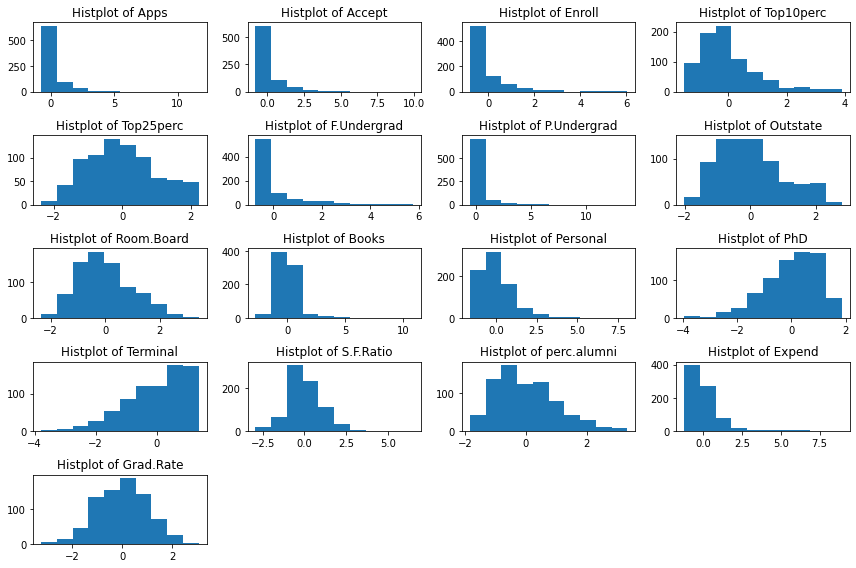

In [32]:
# HISTOGRAM PLOT OF ALL THE FEATURES WITH SCALING
plt.figure(figsize = (12,8))
feature_list = df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    plt.hist(df_pca_scaled[feature_list[i]])
    plt.title('Histplot of {}'.format(feature_list[i]))
    plt.tight_layout()

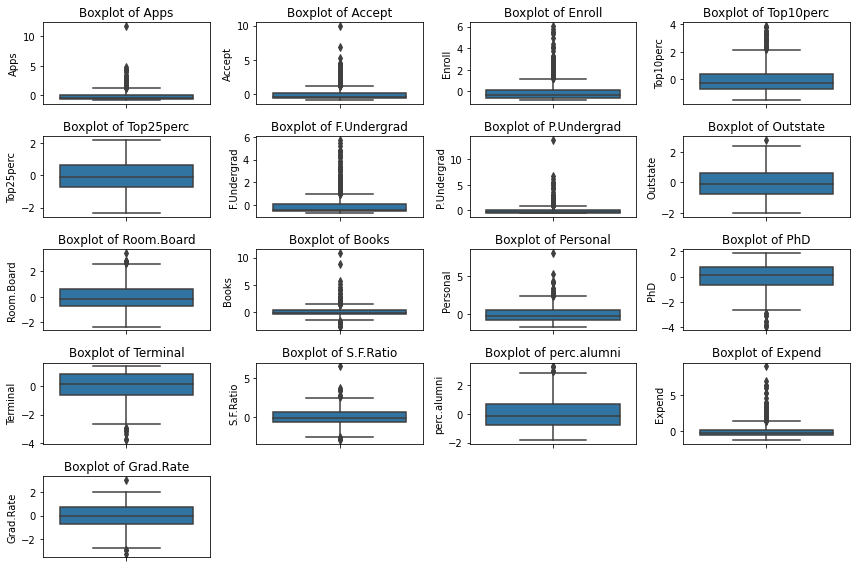

In [33]:
# BOXPLOT OF ALL THE FEATURES WITH SCALING FOR OUTLIER IDENTIFICAITON
plt.figure(figsize = (12,8))
feature_list = df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df_pca_scaled[feature_list[i]], data = df_pca_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

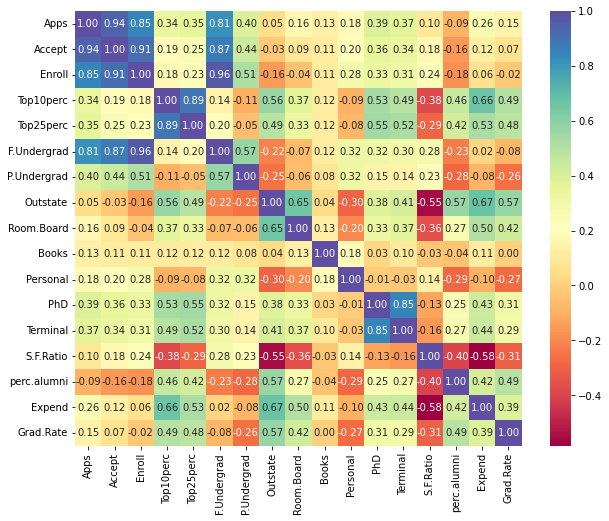

In [34]:
#Check for presence of correlations on scaled data
plt.figure(figsize = (10,8))
sns.heatmap(df_pca_scaled.corr(), annot=True,fmt='.2f',cmap="Spectral");

In [35]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

In [36]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.8131251200373514

In [37]:
#Correlation pairs identificaiton for strong pairs
corr_mat = df_pca.corr()
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_pairs = unique_corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

Expend       S.F.Ratio    -0.583832
S.F.Ratio    Outstate     -0.554821
perc.alumni  S.F.Ratio    -0.402929
S.F.Ratio    Top10perc    -0.384875
             Room.Board   -0.362628
                             ...   
F.Undergrad  Accept        0.874223
Top25perc    Top10perc     0.891995
Enroll       Accept        0.911637
Accept       Apps          0.943451
F.Undergrad  Enroll        0.964640
Length: 136, dtype: float64


In [38]:
negative_pairs = sorted_pairs[sorted_pairs < -0.3]
print(negative_pairs)

Expend       S.F.Ratio    -0.583832
S.F.Ratio    Outstate     -0.554821
perc.alumni  S.F.Ratio    -0.402929
S.F.Ratio    Top10perc    -0.384875
             Room.Board   -0.362628
Grad.Rate    S.F.Ratio    -0.306710
dtype: float64


In [39]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.8]
print(strong_pairs)

F.Undergrad  Apps         0.814491
Enroll       Apps         0.846822
Terminal     PhD          0.849587
F.Undergrad  Accept       0.874223
Top25perc    Top10perc    0.891995
Enroll       Accept       0.911637
Accept       Apps         0.943451
F.Undergrad  Enroll       0.964640
dtype: float64


In [40]:
weak_pairs = sorted_pairs[((abs(sorted_pairs < 0.1)) & (abs(sorted_pairs > -0.1)))]
print(weak_pairs)

Expend       Personal      -0.097892
Personal     Top10perc     -0.093316
perc.alumni  Apps          -0.090226
Expend       P.Undergrad   -0.083568
Personal     Top25perc     -0.080810
Grad.Rate    F.Undergrad   -0.078773
Room.Board   F.Undergrad   -0.068890
             P.Undergrad   -0.061326
P.Undergrad  Top25perc     -0.053577
Room.Board   Enroll        -0.040232
perc.alumni  Books         -0.040208
S.F.Ratio    Books         -0.031929
Terminal     Personal      -0.030613
Outstate     Accept        -0.025755
Grad.Rate    Enroll        -0.022341
PhD          Personal      -0.010936
Grad.Rate    Books          0.001061
Expend       F.Undergrad    0.018652
PhD          Books          0.026906
Books        Outstate       0.038855
Outstate     Apps           0.050159
Expend       Enroll         0.064169
Grad.Rate    Accept         0.067313
Books        P.Undergrad    0.081200
Room.Board   Accept         0.090899
S.F.Ratio    Apps           0.095633
Terminal     Books          0.099955
d

In [41]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [42]:
#Extract eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [43]:
# 1ST PCA COMPONENTS UPTO TWO DECIMELS PLACE 
pcaeigen=pca.components_
np.around(pcaeigen[0], decimals = 2)

array([ 0.25,  0.21,  0.18,  0.35,  0.34,  0.15,  0.03,  0.29,  0.25,
        0.06, -0.04,  0.32,  0.32, -0.18,  0.21,  0.32,  0.25])

In [44]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [45]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [46]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7', 'PC8', 'PC9', 'PC10','PC11','PC12', 'PC13', 'PC14', 'PC15','PC16', 'PC17'],
                                    index = df_pca_scaled.columns)

In [47]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept      -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll      -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc   -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc   -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
F.Undergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
P.Undergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate     0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
Room.Board   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books       -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal     0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD         -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal    -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
S.F.Ratio    0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
perc.alumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend      -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
Grad.Rate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                 PC13      PC14      PC15      PC16      PC17  
Apps         0.595831  0.080633  0.133406  0.459139  0.358970  
Accept       0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll      -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc    0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc    0.021884  0.151742 -0.617275  0.051868  0.080348  
F.Undergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
P.Undergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate    -0.141856 -0.034012  0.038354  0.101595  0.050900  
Room.Board  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books        0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal     0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD          0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal    -0.058313  0.671009  0.158910 -0.027076  0.006209  
S.F.Ratio   -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
perc.alumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend      -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
Grad.Rate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

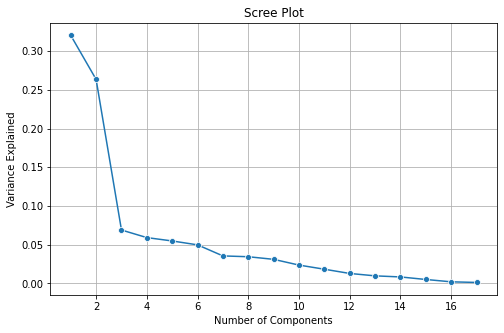

In [48]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [49]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

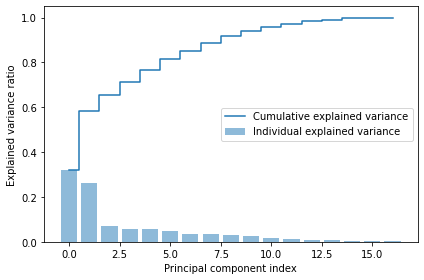

In [50]:
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

exp_var_pca = pca.explained_variance_ratio_
#
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [51]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8','PC9']]

In [52]:
#Check the selected PCs
df_selected

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9  
Apps        -0.042486 -0.103090 -0.090227  
Accept      -0.012950 -0.056271 -0.177865  
Enroll      -0.027693  0.058662 -0.128561  
Top10perc   -0.161332 -0.122678  0.341100  
Top25perc   -0.118486 -0.102492  0.403712  
F.Undergrad -0.025076  0.078890 -0.059442  
P.Undergrad  0.061042  0.570784  0.560673  
Outstate     0.108529  0.009846 -0.004573  
Room.Board   0.209744 -0.221453  0.275023  
Books       -0.149692  0.213293 -0.133663  
Personal     0.633790 -0.232661 -0.094469  
PhD         -0.001096 -0.077040 -0.185182  
Terminal    -0.028477 -0.012161 -0.254938  
S.F.Ratio    0.219259 -0.083605  0.274544  
perc.alumni  0.243321  0.678524 -0.255335  
Expend      -0.226584 -0.054159 -0.049139  
Grad.Rate    0.559944 -0.005336  0.041904

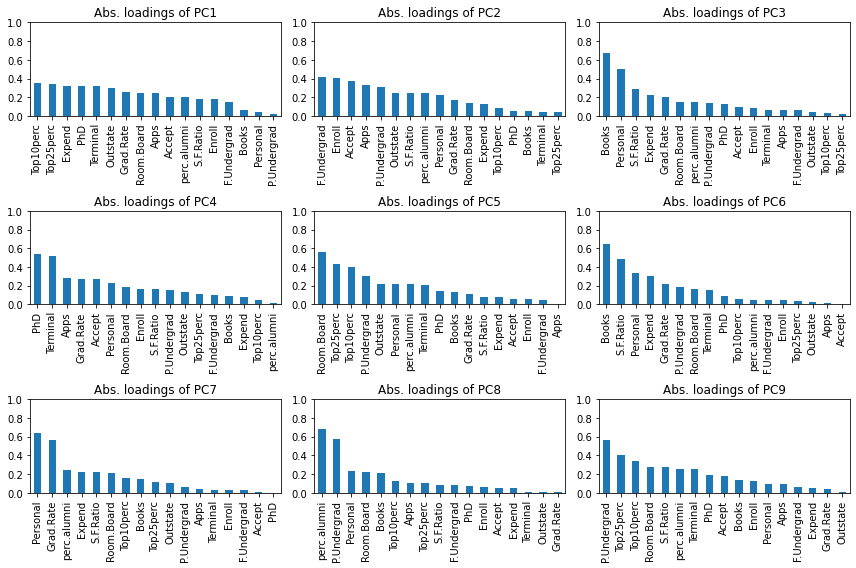

In [53]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,3,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

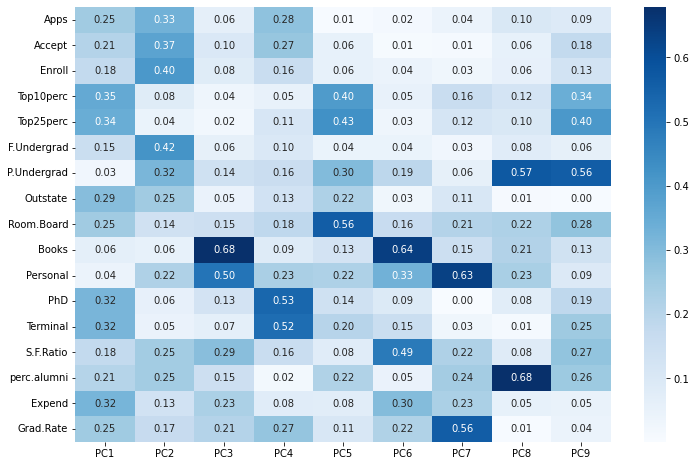

In [54]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [55]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=9, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [56]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306  0.638443   
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137  0.236753   
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592 -0.248276   
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508 -1.249356   
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918 -2.159220   
5 -0.571665 -1.496325  0.024354  0.066944 -0.376261 -0.668344 -1.609835   
6  0.241952 -1.506368  0.234194 -1.142024  1.546983 -0.009995  0.590933   
7  1.750474 -1.461412 -1.026589 -0.981184  0.217044  0.222924  0.038169   
8  0.769127 -1.984433 -1.426052 -0.071424  0.586380 -0.655179 -0.213314   
9 -2.770721 -0.844611  1.627987  1.705091 -1.019826 -0.794401 -0.317891   

        PC8       PC9  
0 -0.879386  0.093084  
1  0.046925  1.113780  
2  0.308740 -0.105452  
3 -0.147694  0.378997  
4 -0.624413 -0.160383  
5 -0.529391  0.263527  
6 -0.329858 -0.653409  
7  0.173929 -0.352525  
8 -0.275114  0.228904  
9 -0.160687  0.228221

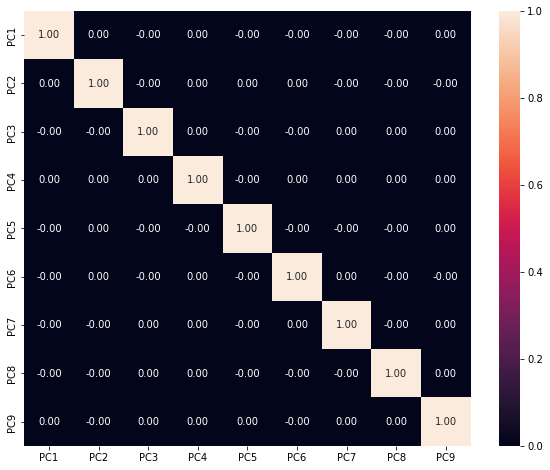

In [57]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');